# 信用情報の学習

Kaggleの **Home Credit Default Risk コンペティション**の学習および推定を行います。


Home Credit Default Risk | Kaggle


## 【問題1】コンペティション内容の確認

**コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。**


**1. 何を学習し、何を予測するのか**

銀行口座を持たないクライアントに対して、電話会社やその他の代替えデータをもとに返済能力を予測する。

**2. どのようなファイルを作りKaggleに提出するか**

SK_ID_CURR テストセットのそれぞれについて、TARGET変数の確率を予測する必要があります。

ファイルにはヘッダーが含まれ、次の形式である必要があります。

SK_ID_CURR,TARGET

100001,0.1

100005,0.9

100013,0.2

etc.

**3. 提出されたものはどういった指標値で評価されるのか**

予測された確率と観察されたターゲットの間のROC曲線の下の領域で評価されます。


### ベースラインモデルの作成

まずは単純な方法による **ベースラインモデル　を作成します。精度の基準となるモデルです。**



精度を高くする必要はありません。**エラーなく実行でき、Kaggle側に推定値を提出できること**を目指します。



## 【問題2】学習と検証

**データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。**



検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #データを分割する
from sklearn import preprocessing
import missingno as msno

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

train_df = pd.read_csv("application_train.csv") #訓練用データ
df = train_df

print('元のデータ')
display(train_df.head())
print('-----------------------------------------------')

print('変換前')
display(train_df.loc[:,["CODE_GENDER","FLAG_OWN_CAR","AMT_CREDIT","AMT_ANNUITY"]].head())

# 
# 分析・・・説明変数を絞る
# 前処理・・説明変数のCODE_GENDER、FLAG_OWN_CARを数値化
# 

print('分析・・・説明変数を絞る')
print('前処理・・説明変数のCODE_GENDER、FLAG_OWN_CARを数値化')

# 1.CODE_GENDERを数値化する
gender_mapping = {'M': 0, 'F': 1}
train_df['CODE_GENDER'] = train_df['CODE_GENDER'].map(gender_mapping)

# 2."FLAG_OWN_CAR"を数値化する
flag_mapping = {'N': float(0), 'Y': float(1)}
train_df["FLAG_OWN_CAR"] = train_df["FLAG_OWN_CAR"].map(flag_mapping)

# 3.train_dfから"AMT_CREDIT","AMT_ANNUITY"を抜き取る
x_df = train_df.loc[:,["CODE_GENDER","FLAG_OWN_CAR","AMT_CREDIT","AMT_ANNUITY"]]
t_df = train_df.loc[:,["TARGET"]]

# 4.結合 説明変数と目的変数を絞ったdataframe
train_df = pd.concat([x_df, t_df], axis=1)
# print(train_df.dtypes)
# print(len(train_df))

# 5.欠損値を削除
train_df = train_df.dropna(thresh=15000,axis=1) #欠損値ありの列 削除
train_df = train_df.dropna(how='any',axis=0) #欠損値ありの行 削除
# print(z_df.loc[:,["DAYS_BIRTH"]])

print('----------------------------------------------')
print('ndarrayへ変換直前のDataFrame')
display(train_df.head())

# 6.ndarrayへ変換  性別・車を持っているか・ローンクレジット額・ローン年金 ４項目に絞る
x = train_df.loc[:,["CODE_GENDER","FLAG_OWN_CAR","AMT_CREDIT","AMT_ANNUITY"]].values
t = train_df["TARGET"].values
# ☆訓練用、テスト用へ分割
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

# ndarrayの総数を確認
print('---学習用、テスト用に分割したndarrayの総数---')
print(len(x_train)) #215257
print(len(t_train)) #215257

print(len(x_test)) #92254
print(len(t_test)) #92254

元のデータ


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

-----------------------------------------------
変換前


,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_ANNUITY
0,M,N,406597.5,24700.5
1,F,N,1293502.5,35698.5
2,M,Y,135000.0,6750.0
3,F,N,312682.5,29686.5
4,M,N,513000.0,21865.5


分析・・・説明変数を絞る
前処理・・説明変数のCODE_GENDER、FLAG_OWN_CARを数値化
----------------------------------------------
ndarrayへ変換直前のDataFrame


,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_ANNUITY,TARGET
0,0.0,0.0,406597.5,24700.5,1
1,1.0,0.0,1293502.5,35698.5,0
2,0.0,1.0,135000.0,6750.0,0
3,1.0,0.0,312682.5,29686.5,0
4,0.0,0.0,513000.0,21865.5,0


---学習用、テスト用に分割したndarrayの総数---
215246
215246
92249
92249


In [277]:
# ベースライン
import numpy as np
from sklearn.dummy import DummyClassifier

# 特徴量エンジニアリングの後にもう一度検証
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, t_train)
base = dummy_clf.predict(t_test)

print(base[0:40])

print(f'ベースライン : {dummy_clf.score(x_train, t_train)}')

print(f'０と予想 {np.sum(base==0)}')
print(f'１と予想 {np.sum(base==1)}')

# ※ベースラインの重要性を解説時に確認する

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
ベースライン : 0.9191250940784034
０と予想 92249
１と予想 0


In [278]:
from sklearn.neighbors import KNeighborsClassifier
# 
# 1.K-近傍法
# 

# 最近傍法（k-nearest neighbors, k-nn）で学習を行います。
kneigh = KNeighborsClassifier(n_neighbors=5)
# k-nnの学習を行ってください。ここで入力するのは訓練データです。
kneigh.fit(x_train, t_train) #k最近傍分類器を適合

#予測（推定）
knei_pre = kneigh.predict(x_test)

print(np.sum(knei_pre==0))
print(np.sum(knei_pre==1))

# 91208
# 1041

# 89818
# 2431

# 84833
# 7416

91208
1041


In [279]:
# 
# 3.ランダムフォレスト
# 

import datetime#元データの日付処理のためにインポート
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト

RandomFor = RandomForestClassifier(random_state=0)
# 学習データを適合
RandomFor.fit(x_train, t_train)

label_pred_RandomFor = RandomFor.predict(x_test)

print(np.sum(label_pred_RandomFor==0))
print(np.sum(label_pred_RandomFor==1))

90940
1309


In [280]:
print(f'ベースライン : {dummy_clf.score(x_train, t_train)}')
print('---------------------------------------------------------------------')
print('★３パターンの予測結果:train.csvのテスト用データ')
print(f'1. K-近傍法 5-nn train score:{kneigh.score(x_train, t_train)}です')
print(f'1. K-近傍法 5-nn テスト用 test score:{kneigh.score(x_test, t_test)}です')
# print(f"1. K-近傍法 予測値は : {knei_pre}") #検証用データ（目標変数）と比較する！
print('---------------------------------------------------------------------')
print(f'3. ランダムフォレスト 学習用 train score: {RandomFor.score(x_train, t_train)}')
print(f'3. ランダムフォレスト テスト用 test score: {RandomFor.score(x_test, t_test)}')
# print(f'3. ランダムフォレスト 予測値 : {label_pred_RandomFor}')

ベースライン : 0.9191250940784034
---------------------------------------------------------------------
★３パターンの予測結果:train.csvのテスト用データ
1. K-近傍法 5-nn train score:0.9172760469416389です
1. K-近傍法 5-nn テスト用 test score:0.9124976964519941です
---------------------------------------------------------------------
3. ランダムフォレスト 学習用 train score: 0.9352554751307806
3. ランダムフォレスト テスト用 test score: 0.9097659595225964


In [281]:
# 検証・評価

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 回答
# 1.scikit leanを使い４種類の指標を計算する
# ★正解率
print('--------------------------------------------------------------')
print('★正解率')
print(f'1.K-近傍法         : 正解率は{accuracy_score(t_test, knei_pre)}です')
# print(f'2.ロジェスティック回帰 : 正解率は{accuracy_score(t_test, label_pred_LogReg)}です')
print(f'3.ランダムフォレスト   : 正解率は{accuracy_score(t_test, label_pred_RandomFor)}です')
print('--------------------------------------------------------------')
print('★Precision（適合率）、 精度ともいう')
print(f'1.K-近傍法         : 適合率は{precision_score(t_test, knei_pre)}です')
# print(f'2.ロジェスティック回帰 : 適合率は{precision_score(t_test, label_pred_LogReg)}です')
print(f'3.ランダムフォレスト   : 適合率は{precision_score(t_test, label_pred_RandomFor)}です')
print('--------------------------------------------------------------')
print('★Recall（再現率） 感度、検出率、真陽性率ともいう')
print(f'1.K-近傍法         : 再現率は{recall_score(t_test, knei_pre)}です')
# print(f'2.ロジェスティック回帰 : 再現率は{recall_score(t_test, label_pred_LogReg)}です')
print(f'3.ランダムフォレスト   : 再現率は{recall_score(t_test, label_pred_RandomFor)}です')
print('--------------------------------------------------------------')
print('★F値 適合率、再現率をバランスよく持ち合わせているか表す指標')
print(f'1.K-近傍法         : F値は{f1_score(t_test, knei_pre)}です')
# print(f'2.ロジェスティック回帰 : F値は{f1_score(t_test, label_pred_LogReg)}です')
print(f'3.ランダムフォレスト   : F値は{f1_score(t_test, label_pred_RandomFor)}です')

# abc = accuracy_score(t_test, knei_pre) + precision_score(t_test, knei_pre) + recall_score(t_test, knei_pre) + f1_score(t_test, knei_pre)
# print(abc)
print('--------------------------------------------------------------')
# 混同行列
from sklearn.metrics import confusion_matrix
knei_confusion = confusion_matrix(t_test, knei_pre)
randomfor_confusion = confusion_matrix(t_test, label_pred_RandomFor)
print(f'{knei_confusion}')
print(f'{randomfor_confusion}')

--------------------------------------------------------------
★正解率
1.K-近傍法         : 正解率は0.9124976964519941です
3.ランダムフォレスト   : 正解率は0.9097659595225964です
--------------------------------------------------------------
★Precision（適合率）、 精度ともいう
1.K-近傍法         : 適合率は0.18539865513928913です
3.ランダムフォレスト   : 適合率は0.15355233002291827です
--------------------------------------------------------------
★Recall（再現率） 感度、検出率、真陽性率ともいう
1.K-近傍法         : 再現率は0.02602130241337468です
3.ランダムフォレスト   : 再現率は0.027099905622219225です
--------------------------------------------------------------
★F値 適合率、再現率をバランスよく持ち合わせているか表す指標
1.K-近傍法         : F値は0.045637266493260824です
3.ランダムフォレスト   : F値は0.04606921842768737です
--------------------------------------------------------------
[[83984   848]
 [ 7224   193]]
[[83724  1108]
 [ 7216   201]]


## 【問題3】テストデータに対する推定

テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。


正しく提出が行えていれば、精度は低くても構いません。

### 特徴量エンジニアリング

ベースラインモデルを元に、入力する特徴量にさまざまな工夫を行い精度を向上させていきます。

In [282]:
# 解答

# テスト用のcsvを読み込む
test_df = pd.read_csv("application_test.csv")

# train.csvと同じく前処理をする

# 1.CODE_GENDERを数値化する
test_df['CODE_GENDER'] = test_df['CODE_GENDER'].map(gender_mapping)

# 2."FLAG_OWN_CAR"を数値化する
test_df["FLAG_OWN_CAR"] = test_df["FLAG_OWN_CAR"].map(flag_mapping)

# 3.欠損値を削除
test_df = test_df.dropna(thresh=15000,axis=1) #欠損値ありの列 削除
test_df = test_df.dropna(how='any',axis=0) #欠損値ありの行 削除

# 4.ndarrayへ
test = test_df.loc[:,["CODE_GENDER","FLAG_OWN_CAR","AMT_CREDIT","AMT_ANNUITY"]].values

print(f'変換したndarrayの総数は{len(test)}です')
print('--------------------------------------------')

# 問題２で作成した学習モデルで予測
test_knei = kneigh.predict(test)
test_pred_RandomFor = RandomFor.predict(test)
# print(f'1.K-近傍法での予測:{test_knei}') #あとでコメントアウト外す
# print(f'3.ランダムフォレストでの予測:{test_pred_RandomFor}') #あとでコメントアウト外す
print(f'予測した値の総数は{len(test_knei)}です')



変換したndarrayの総数は1739です
--------------------------------------------
予測した値の総数は1739です


## 【問題4】特徴量エンジニアリング

精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。


**1. どの特徴量を使うか**

**2. どう前処理をするか**

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。

**最低5パターンの学習・検証を行ってください。**


精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

In [283]:
# from sklearn.impute import SimpleImputer 
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') #nanの値を平均の値で補完


# tは元々の目的変数のデータなので再準備必要なし

# 追加した特徴量を元々も説明変数のdfと結合→ndarray変換→訓練、テスト用へ分割→上の関数で精度を測る


# 
# 1. 負の相関性の高い特徴量を追加する(BIRTH)
# 
minus_df = df["EXT_SOURCE_3"].fillna(df["EXT_SOURCE_3"].mean())  # .特徴量選定+欠損値を平均値で補完
minus_df = pd.concat([minus_df, train_df], axis=1)
# df完成
# display(minus_df)

minus_df = minus_df.dropna(how="any",axis=0) #.欠損値のある行削除

#.ndarray分割
x_minus = minus_df.drop(["TARGET"], axis=1).values
t_minus = minus_df["TARGET"].values

# .学習用、テスト用分割
m_x_train, m_x_test, m_t_train, m_t_test = train_test_split(x_minus, t_minus, test_size=0.3, random_state=0)


# 
# # 2. 正の相関性の高い特徴量を追加
# 
plus_df = df["DAYS_BIRTH"].fillna(df["DAYS_BIRTH"].mean())  # .特徴量選定+欠損値を平均値で補完
plus_df = pd.concat([plus_df, train_df], axis=1)
# df完成

plus_df = plus_df.dropna(how="any",axis=0) #.欠損値のある行削除

#.ndarray分割
x_plus = plus_df.drop(["TARGET"], axis=1).values
t_plus = plus_df["TARGET"].values

# .学習用、テスト用分割
p_x_train, p_x_test, p_t_train, p_t_test = train_test_split(x_plus, t_plus, test_size=0.3, random_state=0)


# 
# # 3. 正の相関性と負の相関性が中間くらいの特徴量
# 

# # LIVE_REGION_NOT_WORK_REGION 
middle_df = df.loc[:,["LIVE_REGION_NOT_WORK_REGION"]]
middle_df = pd.concat([middle_df, train_df], axis=1)
# df完成

middle_df = middle_df.dropna(how="any",axis=0) #.欠損値のある行削除

#.ndarray分割
x_middle = middle_df.drop(["TARGET"], axis=1).values
t_middle = middle_df["TARGET"].values

# .学習用、テスト用分割
d_x_train, d_x_test, d_t_train, d_t_test = train_test_split(x_middle, t_middle, test_size=0.3, random_state=0)

In [284]:
# 
#k-近傍法  
# 

k_neigh = KNeighborsClassifier(n_neighbors=5)   
k_neigh_m = KNeighborsClassifier(n_neighbors=5)   
k_neigh_p = KNeighborsClassifier(n_neighbors=5)   
k_neigh_d = KNeighborsClassifier(n_neighbors=5)   

#学習
k_neigh.fit(x_train, t_train)
k_neigh_m.fit(m_x_train, m_t_train)
k_neigh_p.fit(p_x_train, p_t_train)
k_neigh_d.fit(d_x_train, d_t_train)

#予測（推定:学習した結果が出てくる）
k_neigh_pre = k_neigh.predict(x_test)
k_neigh_ban = k_neigh.predict_proba(x_test)
k_neigh_minus = k_neigh_m.predict(m_x_test)
k_neigh_plus = k_neigh_p.predict(p_x_test)
k_neigh_middle = k_neigh_d.predict(d_x_test)

# 各特徴量エンジニアリングの結果の混合行列
knei_confusion = confusion_matrix(t_test, k_neigh_pre)
knei_confusion_m = confusion_matrix(m_t_test, k_neigh_minus)
knei_confusion_p = confusion_matrix(p_t_test, k_neigh_plus)
knei_confusion_d = confusion_matrix(d_t_test, k_neigh_middle)

# =====================================================================

#インスタンス定義   
random_for = RandomForestClassifier(random_state=0) #ランダムフォレスト
random_for_m = RandomForestClassifier(random_state=0) 
random_for_p = RandomForestClassifier(random_state=0) 
random_for_d = RandomForestClassifier(random_state=0) 

#学習
random_for.fit(x_train, t_train)
random_for_m.fit(m_x_train, m_t_train)
random_for_p.fit(p_x_train, p_t_train)
random_for_d.fit(d_x_train, d_t_train)


#予測（推定:学習した結果が出てくる）
random_for_pre = random_for.predict(x_test)
random_for_proba = random_for.predict_proba(x_test)
random_for_minus = random_for_m.predict(m_x_test)
random_for_plus = random_for_p.predict(p_x_test)
random_for_middle = random_for_d.predict(d_x_test)

randomfor_confusion = confusion_matrix(t_test, random_for_pre)
randomfor_confusion_m = confusion_matrix(m_t_test, random_for_minus)
randomfor_confusion_p = confusion_matrix(p_t_test, random_for_plus)
randomfor_confusion_d = confusion_matrix(d_t_test, random_for_middle)

# 特徴量エンジニアリングを行なったndarrayを上の関数で結果測定する

In [285]:
# 1. 負の相関性の高い特徴量を追加した結果

print('●1. 負の相関性を追加した結果')
print('---------------------------------------------------')
print(f'k-近傍法の予測結果 : \n{k_neigh_minus}')
# print(f'k-近傍法の各種数値(正解率、適合率、再現率、F1値) : \n{answer_minus_k[1]}')
print(f'k-近傍法の混合行列 : \n{knei_confusion_m}')
print('---------------------------------------------------')
print(f'ランダムフォレストの予測結果 : \n{random_for_minus}')
# print(f'ランダムフォレストの各種数値(正解率、適合率、再現率、F1値) : \n{answer_minus_ran[1]}')
print(f'ランダムフォレストの混合行列 : \n{randomfor_confusion_m}')
print('---------------------------------------------------\n\n')


print('●2. 正の相関性を追加した結果')
print('---------------------------------------------------')
print(f'k-近傍法の予測結果 : \n{k_neigh_plus}')
# print(f'k-近傍法の各種数値(正解率、適合率、再現率、F1値) : \n{answer_plus_k[1]}')
print(f'k-近傍法の混合行列 : \n{knei_confusion_p}')
# print('---------------------------------------------------')
print(f'ランダムフォレストの予測結果 : \n{random_for_plus}')
# print(f'ランダムフォレストの各種数値(正解率、適合率、再現率、F1値) : \n{answer_plus_ran[1]}')
print(f'ランダムフォレストの混合行列 : \n{randomfor_confusion_p}')
print('---------------------------------------------------\n\n')

print('●3. 中間の相関性を追加した結果')
print('---------------------------------------------------')
print(f'k-近傍法の予測結果 : \n{k_neigh_middle}')
# print(f'k-近傍法の各種数値(正解率、適合率、再現率、F1値) : \n{answer_middle_k[1]}')
print(f'k-近傍法の混合行列 : \n{knei_confusion_m}')
# print('---------------------------------------------------')
print(f'ランダムフォレストの予測結果 : \n{random_for_middle}')
# print(f'ランダムフォレストの各種数値(正解率、適合率、再現率、F1値) : \n{answer_middle_ran[1]}')
print(f'ランダムフォレストの混合行列 : \n{randomfor_confusion_d}')
print('---------------------------------------------------')


●1. 負の相関性を追加した結果
---------------------------------------------------
k-近傍法の予測結果 : 
[0. 0. 0. ... 0. 0. 0.]
k-近傍法の混合行列 : 
[[83954   878]
 [ 7178   239]]
---------------------------------------------------
ランダムフォレストの予測結果 : 
[0. 0. 0. ... 0. 0. 0.]
ランダムフォレストの混合行列 : 
[[83600  1232]
 [ 7144   273]]
---------------------------------------------------


●2. 正の相関性を追加した結果
---------------------------------------------------
k-近傍法の予測結果 : 
[0. 0. 0. ... 0. 0. 0.]
k-近傍法の混合行列 : 
[[84106   726]
 [ 7249   168]]
ランダムフォレストの予測結果 : 
[0. 0. 0. ... 0. 0. 0.]
ランダムフォレストの混合行列 : 
[[83527  1305]
 [ 7189   228]]
---------------------------------------------------


●3. 中間の相関性を追加した結果
---------------------------------------------------
k-近傍法の予測結果 : 
[0. 0. 0. ... 0. 0. 0.]
k-近傍法の混合行列 : 
[[83954   878]
 [ 7178   239]]
ランダムフォレストの予測結果 : 
[0. 0. 0. ... 0. 0. 0.]
ランダムフォレストの混合行列 : 
[[83703  1129]
 [ 7216   201]]
---------------------------------------------------


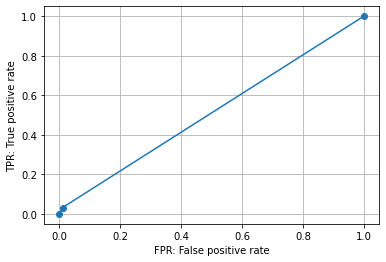

In [286]:
# k近傍法 負の相関性を追加
roc = roc_curve(m_t_test, k_neigh_minus)
fpr, tpr, thresholds = roc_curve(m_t_test, k_neigh_minus)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

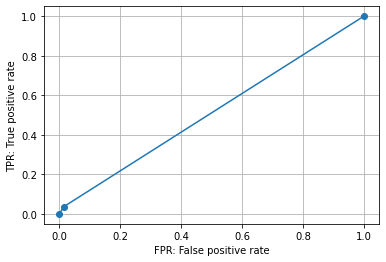

In [287]:
# ランダムフォレスト 正の相関を追加
roc = roc_curve(p_t_test, random_for_minus)
fpr, tpr, thresholds = roc_curve(p_t_test, random_for_minus)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

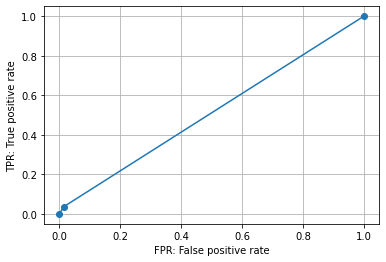

0.9841623073134925
0.9092022677752605


In [288]:
# ランダムフォレスト 負の相関を追加
roc = roc_curve(m_t_test, random_for_minus)
fpr, tpr, thresholds = roc_curve(m_t_test, random_for_minus)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

print(random_for_m.score(m_x_train, m_t_train))
print(random_for_m.score(m_x_test, m_t_test))

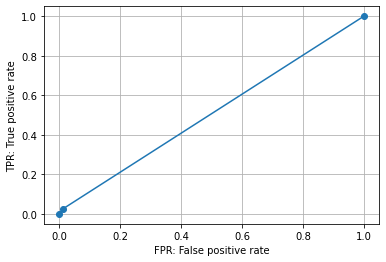

In [289]:
# 元々の学習データ
roc = roc_curve(t_test, label_pred_RandomFor)
fpr, tpr, thresholds = roc_curve(t_test, label_pred_RandomFor)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

In [291]:
# テストデータで精度を判定
# test_knei = kneigh.predict(test)
# test_pred_RandomFor = RandomFor.predict(test)

# k_test_minus = k_neigh_m.predict(test)
# k_test_plus = k_neigh_p.predict(test)
# k_test_middle = k_neigh_d.predict(test)

# print(k_test_minus)

# test_confusion_m = confusion_matrix(test, k_neigh_minus)
# test_confusion_p = confusion_matrix(test, k_neigh_plus)
# test_confusion_d = confusion_matrix(test, k_neigh_middle)

# print(test_confusion_m)
# print(test_confusion_p)
# print(test_confusion_d)

# random_test_minus = random_for_m.predict(test)
# random_test_plus = random_for_p.predict(test)
# random_test_middle = random_for_d.predict(test)